In [2]:
import sys
#stdout = sys.stdout
#reload(sys)
#sys.setdefaultencoding('utf-8')
#sys.stdout = stdout

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import math
import json

# pd.options.mode.chained_assignment = None

from astropy.table import Table, Column
#from string import join
import re,pickle
from sklearn.preprocessing import label_binarize, OneHotEncoder, LabelEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn import metrics
# imports for sklearn transformers
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

# imports for sklearn preprocessing transformers
from sklearn.preprocessing import *

# Feature extraction packages
from sklearn.feature_extraction import *
from sklearn.feature_extraction.text import *
from collections import defaultdict
from sklearn.pipeline import Pipeline, FeatureUnion

import os
#os.environ["ML_SDK_CONF_BUCKET"]="stage-ml-platform-sdk"
#from mlsdk.MLApi import MLApi
# import seaborn as sns
# sns.set_style("dark")
# plt.rcParams['figure.figsize'] = 16, 12

In [3]:
pd.set_option('display.max_columns', 500)

# Data Loading

In [4]:
df_raw_feat_and_label = pd.read_csv('train_sample.csv', delimiter = ',', na_values = ['nan', 'NA', 'null', 'NULL'])

In [5]:
df_raw_feat_and_label.shape

(100000, 8)

In [6]:
df_raw_feat_and_label.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [131]:
df_raw_feat_and_label['is_attributed'].value_counts()/df_raw_feat_and_label.shape[0]


0    0.99773
1    0.00227
Name: is_attributed, dtype: float64

In [8]:
df_raw_feat_and_label.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000,227,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,80350,227,NaN
top,NaN,NaN,NaN,NaN,NaN,2017-11-08 12:01:02,2017-11-07 23:11:40,NaN
freq,NaN,NaN,NaN,NaN,NaN,7,1,NaN
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,NaN,NaN,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,NaN,NaN,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,NaN,NaN,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,NaN,NaN,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,NaN,NaN,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,NaN,NaN,0.000000


In [9]:
df_raw_feat_and_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [10]:
cat=['ip','app','device','os','channel','is_attributed']
for feat in cat:
    df_raw_feat_and_label[feat]=df_raw_feat_and_label[feat].astype('category')
    
df_raw_feat_and_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null category
dtypes: category(6), object(2)
memory usage: 4.2+ MB


In [11]:
df_raw_feat_and_label.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000,100000,100000,100000,100000,100000,227,100000
unique,34857,161,100,130,161,80350,227,2
top,5348,3,1,19,280,2017-11-08 12:01:02,2017-11-07 23:11:40,0
freq,669,18279,94338,23870,8114,7,1,99773


In [12]:
df_raw_feat_and_label['click_time']=pd.to_datetime(df_raw_feat_and_label['click_time'])
df_raw_feat_and_label.info()
df_raw_feat_and_label.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null datetime64[ns]
attributed_time    227 non-null object
is_attributed      100000 non-null category
dtypes: category(6), datetime64[ns](1), object(1)
memory usage: 4.2+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,227,100000.0
unique,34857.0,161.0,100.0,130.0,161.0,80350,227,2.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-07 23:11:40,0.0
freq,669.0,18279.0,94338.0,23870.0,8114.0,7,1,99773.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN


In [13]:
#get weekday part of day from click time
import time
import datetime as dt
from datetime import date
#df_raw_feat_and_label['click_hour']=df_raw_feat_and_label['click_time'].dt.hour 
#df_raw_feat_and_label['click_time'].dt.weekday
labels=[1,2,3,4,5,6]
df_raw_feat_and_label['click_part_of_day']=pd.cut(df_raw_feat_and_label['click_time'].dt.hour , bins=6, labels=labels)
df_raw_feat_and_label['click_is_weekend']=df_raw_feat_and_label['click_time'].dt.weekday.map({0:0,1:0,2:0,3:0,4:0,5:1,6:1})

In [14]:
df_raw_feat_and_label.describe(include='all')
df_raw_feat_and_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
ip                   100000 non-null category
app                  100000 non-null category
device               100000 non-null category
os                   100000 non-null category
channel              100000 non-null category
click_time           100000 non-null datetime64[ns]
attributed_time      227 non-null object
is_attributed        100000 non-null category
click_part_of_day    100000 non-null category
click_is_weekend     100000 non-null int64
dtypes: category(7), datetime64[ns](1), int64(1), object(1)
memory usage: 5.1+ MB


In [15]:
df_raw_feat_and_label['click_is_weekend']=df_raw_feat_and_label['click_is_weekend'].astype('category')
df_raw_feat_and_label.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_is_weekend
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,227,100000.0,100000.0,100000.0
unique,34857.0,161.0,100.0,130.0,161.0,80350,227,2.0,6.0,1.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-07 23:11:40,0.0,2.0,0.0
freq,669.0,18279.0,94338.0,23870.0,8114.0,7,1,99773.0,21607.0,100000.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN,NaN,NaN


In [16]:
df_raw_feat_and_label['click_time'].dt.date.unique()
# is weekend is of no use

array([datetime.date(2017, 11, 7), datetime.date(2017, 11, 9),
       datetime.date(2017, 11, 8), datetime.date(2017, 11, 6)], dtype=object)

In [35]:
pd.crosstab(df_raw_feat_and_label.app,df_raw_feat_and_label.is_attributed)

KeyError: -1

In [54]:
pd.crosstab(df_raw_feat_and_label.device,df_raw_feat_and_label.is_attributed)

is_attributed,0,1
device,,
0,489,52
1,94192,146
2,4343,2
4,2,1
5,7,0
6,7,1
7,2,0
9,1,0
11,1,0


In [18]:
pd.crosstab(df_raw_feat_and_label.channel,df_raw_feat_and_label.is_attributed)

is_attributed,0,1
channel,,
3,486,2
4,1,0
5,2,5
13,67,0
15,2,0
17,115,0
18,25,0
19,678,0
21,161,19


In [33]:
df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')[(df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')['counts']==0) & (df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')['is_attributed']==1)]

,app,is_attributed,counts


In [34]:
df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')

,app,is_attributed,counts
0,1,0,3135
1,2,0,11737
2,3,0,18275
3,3,1,4
4,4,0,58
5,5,0,174
6,5,1,14
7,6,0,1303
8,7,0,981
9,8,0,2000


In [36]:
df_raw_feat_and_label.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_is_weekend
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,3,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,4,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,5,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,3,0


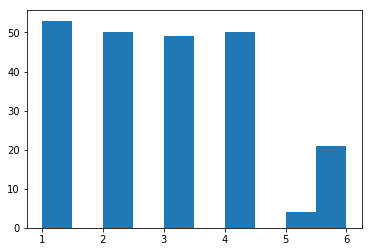

In [43]:
from matplotlib import pyplot
plt.hist(df_raw_feat_and_label['click_part_of_day'][df_raw_feat_and_label['is_attributed']==1])
#plt.hist(df_raw_feat_and_label['is_attributed'])
plt.show()

In [44]:
df_raw_feat_and_label.groupby(['click_part_of_day','is_attributed']).size().reset_index(name='counts')

,click_part_of_day,is_attributed,counts
0,1,0,21105
1,1,1,53
2,2,0,21557
3,2,1,50
4,3,0,20247
5,3,1,49
6,4,0,21413
7,4,1,50
8,5,0,8037
9,5,1,4


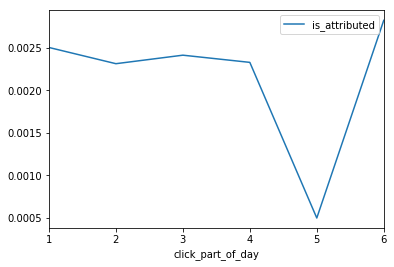

In [138]:
df_raw_feat_and_label['click_part_of_day']=df_raw_feat_and_label['click_part_of_day'].astype('category')
df_raw_feat_and_label['is_attributed']=df_raw_feat_and_label['is_attributed'].astype('int64')
df_raw_feat_and_label[['click_part_of_day','is_attributed']].groupby('click_part_of_day').mean().plot()

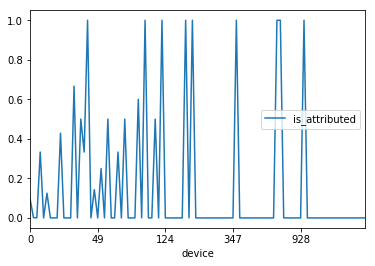

In [137]:
df_raw_feat_and_label[['device','is_attributed']].groupby('device').mean().plot()

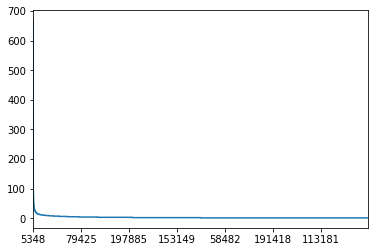

In [415]:
df_raw_feat_and_label['ip'].value_counts().plot()

In [216]:
app_prcnt=pd.DataFrame(df_raw_feat_and_label['app'].value_counts()/df_raw_feat_and_label.shape[0])
type(app_prcnt)
app_prcnt=app_prcnt.reset_index()

In [228]:
app_to_be_bucketed=pd.DataFrame(app_prcnt[app_prcnt['app']<0.001]['index'])
app_to_be_bucketed['app_new']='less_app'
app_to_be_bucketed.columns=['app','app_new']
app_to_be_bucketed.describe()
app_to_be_bucketed.head()

,app,app_new
31,150,less_app
32,4,less_app
33,47,less_app
34,56,less_app
35,35,less_app


In [222]:
type(app_to_be_bucketed)

pandas.core.series.Series

In [435]:
class MissingValueImputerWithValue(BaseEstimator, TransformerMixin):
     
    def __init__(self, value = 0):
        self.value = value
        
    def transform(self, X):
        return X.fillna(self.value) 
   
    def fit(self, X, y=None):
        return self
    
    
class DFSubsetSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        self.cols = cols
        
    def transform(self, X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class CombineTail(BaseEstimator, TransformerMixin):
    def __init__(self, a,b):
        self.a=a
        self.b=b
        
    def fit(self,x,y=None):
        q=pd.DataFrame(x[self.a].value_counts()/x.shape[0]).reset_index()
        self.y=pd.DataFrame(q[q[self.a]<0.001]['index'])
        self.y[self.b]='less_'+ self.a
        self.y.columns=[self.a,self.b]
        return self
    
    def transform(self,x):
        self.x_tmp=pd.merge(x, self.y, how='left', on=self.a)
        self. x_tmp[self.b]=self.x_tmp[self.b].fillna(self.x_tmp[self.a])
        self.x_tmp[self.a]=self.x_tmp[self.b]
        self.x_tmp=self.x_tmp.drop(self.b,axis=1)
        x=pd.DataFrame(self.x_tmp)
        x[self.a]=x[self.a].astype('str')
        return x
        
        
        
        
        
        
        
       
        
    

class CatToOnehot(BaseEstimator, TransformerMixin):
    
    def __init__(self, col=None):
        self.lenc = LabelEncoder()
        self.ohenc = OneHotEncoder()
        self.col = col
        
    def fit(self, s, y=None):
        self.lenc.fit(s)
        self.derived_feat_name = [self.col+"_"+str(l) for l in list(self.lenc.classes_)]
        x_tmp = np.array(self.lenc.transform(s), ndmin = 2).T
        self.ohenc.fit(x_tmp)
        return self

    def transform(self, s):
        x_tmp = np.array(self.lenc.transform(s), ndmin = 2).T
        return self.ohenc.transform(x_tmp)
    



In [446]:
del x
del df_test
del df_train

In [447]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb

learner = LogisticRegression()
#learner2 = RandomForestClassifier(n_jobs=-1,random_state=0,verbose=1,n_estimators=200)
#learner3 = LogisticRegression(n_jobs=-1)

#learner = VotingClassifier([('lr1',learner1),('lr2',learner2),('lr3',learner3)],voting='soft')
#from sklearn.linear_model import LogisticRegression

# Train test split
df_train, df_test, y_train, y_test = model_selection.train_test_split(df_raw_feat_and_label, df_raw_feat_and_label['is_attributed'], test_size = 0.0001, random_state=12, stratify = df_raw_feat_and_label['is_attributed'])

In [449]:
transformer_list=[]
a=['app','device','ip','os','channel','click_part_of_day']
b=['app_new','device_new','ip_new','os_new','channel_new','click_part_of_day_new']
for i in range(6):
    transformer_list.append((a[i],Pipeline(
        [
            ('Selector' , DFSubsetSelector([a[i]])),( a[i],CombineTail(a[i],b[i])),('OneHot' , CatToOnehot(a[i])),
        ])))
    
    

all_feature_extractor_preprocessor=FeatureUnion(transformer_list=transformer_list)
#('OneHot' , CatToOnehot(a[i])),

In [450]:
print(all_feature_extractor_preprocessor)

FeatureUnion(n_jobs=1,
       transformer_list=[('app', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['app'])), ('app', CombineTail(a='app', b='app_new')), ('OneHot', CatToOnehot(col='app'))])), ('device', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['device'])), ('device', Combin...lick_part_of_day', b='click_part_of_day_new')), ('OneHot', CatToOnehot(col='click_part_of_day'))]))],
       transformer_weights=None)


In [451]:
print(transformer_list)

[('app', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['app'])), ('app', CombineTail(a='app', b='app_new')), ('OneHot', CatToOnehot(col='app'))])), ('device', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['device'])), ('device', CombineTail(a='device', b='device_new')), ('OneHot', CatToOnehot(col='device'))])), ('ip', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['ip'])), ('ip', CombineTail(a='ip', b='ip_new')), ('OneHot', CatToOnehot(col='ip'))])), ('os', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['os'])), ('os', CombineTail(a='os', b='os_new')), ('OneHot', CatToOnehot(col='os'))])), ('channel', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['channel'])), ('channel', CombineTail(a='channel', b='channel_new')), ('OneHot', CatToOnehot(col='channel'))])), ('click_part_of_day', Pipeline(memory=None,
     steps=[('Selector', DFSubsetSelector(cols=['click_part_of_day']))

In [452]:
df_train.shape, df_test.shape,y_train.shape, y_test.shape

((99990, 11), (10, 11), (99990,), (10,))

In [453]:
df_train['is_attributed'].value_counts()

0    99763
1      227
Name: is_attributed, dtype: int64

In [454]:
df_test['is_attributed'].value_counts()

0    10
Name: is_attributed, dtype: int64

In [455]:
all_feature_extractor_preprocessor.fit(df_train)
X_train=all_feature_extractor_preprocessor.transform(df_train)
X_test=all_feature_extractor_preprocessor.transform(df_test)


C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label

In [456]:
X_train.shape

(99990, 210)

In [457]:
print(X_train.shape,X_test.shape)

(99990, 210) (10, 210)


In [458]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [459]:
learner.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [460]:
y_train_pred=learner.predict(X_train)
print(metrics.classification_report(y_train,y_train_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     99763
          1       1.00      0.04      0.08       227

avg / total       1.00      1.00      1.00     99990



In [461]:
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)

[[99763     0]
 [  218     9]]


In [462]:
rf=RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=200)


In [463]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

[[99747    16]
 [  130    97]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     99763
          1       0.86      0.43      0.57       227

avg / total       1.00      1.00      1.00     99990

0.713576197615


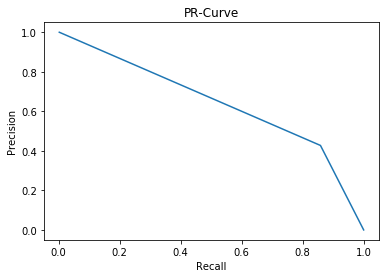

In [464]:
y_train_pred=rf.predict(X_train)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred)
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
print(metrics.roc_auc_score(y_train,y_train_pred))

# Main train sample load

In [119]:
df=pd.read_csv('train.csv')

In [183]:
df_sample=df.sample(100000)

In [184]:
df_sample.shape

(100000, 8)

In [185]:
df_sample['is_attributed'].value_counts()/df_sample.shape[0]

0    0.99791
1    0.00209
Name: is_attributed, dtype: float64

In [186]:
cat=['ip','app','device','os','channel']
for feat in cat:
    df_sample[feat]=df_sample[feat].astype('category')
    
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 17117058 to 15011724
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null object
attributed_time    209 non-null object
is_attributed      100000 non-null int64
dtypes: category(5), int64(1), object(2)
memory usage: 16.6+ MB


In [187]:
df_sample['click_time']=pd.to_datetime(df_sample['click_time'])
df_sample.info()
df_sample.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 17117058 to 15011724
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null datetime64[ns]
attributed_time    209 non-null object
is_attributed      100000 non-null int64
dtypes: category(5), datetime64[ns](1), int64(1), object(1)
memory usage: 16.6+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,209,100000.000000
unique,34799.0,160.0,97.0,120.0,161.0,80285,209,NaN
top,5348.0,3.0,1.0,19.0,280.0,2017-11-09 14:29:31,2017-11-07 10:38:00,NaN
freq,680.0,18395.0,94330.0,23858.0,8211.0,5,1,NaN
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 15:26:02,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:58,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002090
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045669
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [188]:
#get weekday part of day from click time
import time
import datetime as dt
from datetime import date
#df_raw_feat_and_label['click_hour']=df_raw_feat_and_label['click_time'].dt.hour 
#df_raw_feat_and_label['click_time'].dt.weekday
labels=[1,2,3,4,5,6]
df_sample['click_part_of_day']=pd.cut(df_sample['click_time'].dt.hour , bins=6, labels=labels)
df_sample['click_weekday']=df_sample['click_time'].dt.weekday

In [465]:
df_sample.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_weekday
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,209,100000.000000,100000.0,100000.00000
unique,34799.0,160.0,97.0,120.0,161.0,80285,209,NaN,6.0,NaN
top,5348.0,3.0,1.0,19.0,280.0,2017-11-09 14:29:31,2017-11-07 10:38:00,NaN,2.0,NaN
freq,680.0,18395.0,94330.0,23858.0,8211.0,5,1,NaN,21671.0,NaN
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 15:26:02,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:58,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002090,NaN,1.86436
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045669,NaN,0.88932
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.00000


In [466]:
df_sample['click_weekday']=df_sample['click_weekday'].astype('category')
df_sample.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_weekday
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,209,100000.000000,100000.0,100000.0
unique,34799.0,160.0,97.0,120.0,161.0,80285,209,NaN,6.0,4.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-09 14:29:31,2017-11-07 10:38:00,NaN,2.0,2.0
freq,680.0,18395.0,94330.0,23858.0,8211.0,5,1,NaN,21671.0,34186.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 15:26:02,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:58,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002090,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045669,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [467]:

X_train_sample=all_feature_extractor_preprocessor.transform(df_sample)
y_train_sample=df_sample['is_attributed']

C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains new labels: ['0' '120' '136' '142' '152' '154' '155' '164' '167' '177' '182' '186'
 '214' '236' '244' '248' '260' '282' '290' '297' '303' '328' '365' '401'
 '419' '481' '51' '537' '542' '57' '73']

# Manipulation and modeling On Main Training Dataset

In [469]:
df.shape

(184903890, 8)

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 8 columns):
ip                 category
app                category
device             category
os                 category
channel            category
click_time         object
attributed_time    object
is_attributed      int64
dtypes: category(5), int64(1), object(2)
memory usage: 6.2+ GB


In [471]:
df['click_time']=pd.to_datetime(df['click_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 8 columns):
ip                 category
app                category
device             category
os                 category
channel            category
click_time         datetime64[ns]
attributed_time    object
is_attributed      int64
dtypes: category(5), datetime64[ns](1), int64(1), object(1)
memory usage: 6.2+ GB


In [472]:
#get weekday part of day from click time
import time
import datetime as dt
from datetime import date
#df_raw_feat_and_label['click_hour']=df_raw_feat_and_label['click_time'].dt.hour 
#df_raw_feat_and_label['click_time'].dt.weekday
labels=[1,2,3,4,5,6]
df['click_part_of_day']=pd.cut(df['click_time'].dt.hour , bins=6, labels=labels)
df['click_weekday']=df['click_time'].dt.weekday.astype('category')

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 10 columns):
ip                   category
app                  category
device               category
os                   category
channel              category
click_time           datetime64[ns]
attributed_time      object
is_attributed        int64
click_part_of_day    category
click_weekday        category
dtypes: category(7), datetime64[ns](1), int64(1), object(1)
memory usage: 6.6+ GB


In [476]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
#import xgboost as xgb

log = LogisticRegression()
rf= RandomForestClassifier(n_jobs=-1,random_state=0,verbose=1,n_estimators=200,max_depth=4)
#learner3 = LogisticRegression(n_jobs=-1)
#xgb = xgb.XGBClassifier(nthread=-1,max_depth=4)
#clf=RandomForestClassifier(n_jobs=-1)
gb=GradientBoostingClassifier(max_depth=4)
dt = tree.DecisionTreeClassifier(max_depth=5)

#learner = VotingClassifier([('lr1',learner1),('lr2',learner2),('lr3',learner3)],voting='soft')
#from sklearn.linear_model import LogisticRegression

# Train test split
df_train, df_test, y_train, y_test = model_selection.train_test_split(df, df['is_attributed'], test_size = 0.2, random_state=12, stratify = df['is_attributed'])

In [483]:
df_train.shape

(147923112, 10)

In [484]:
df_test.shape

(36980778, 10)

In [485]:
y_train.shape

(147923112,)

In [477]:
transformer_list=[]
a=['app','device','ip','os','channel','click_part_of_day']
b=['app_new','device_new','ip_new','os_new','channel_new','click_part_of_day_new']
for i in range(6):
    transformer_list.append((a[i],Pipeline(
        [
            ('Selector' , DFSubsetSelector([a[i]])),( a[i],CombineTail(a[i],b[i])),('OneHot' , CatToOnehot(a[i])),
        ])))
    
    

all_feature_extractor_preprocessor=FeatureUnion(transformer_list=transformer_list)

In [478]:
all_feature_extractor_preprocessor.fit(df_train)
X_train=all_feature_extractor_preprocessor.transform(df_train)
X_test=all_feature_extractor_preprocessor.transform(df_test)

C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label

In [498]:
type(X_train),type(X_test)

(scipy.sparse.csr.csr_matrix, scipy.sparse.csr.csr_matrix)

In [499]:
X_train.shape

(147923112, 207)

In [500]:
X_test.shape

(36980778, 207)

In [ ]:
#deleted unwanted files
del df
del df_sample
del df_raw_feat_and_label
del df_train
del df_test
del X_train_sample

# Simple Logistic Regression

In [501]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [502]:
y_train_pred=log.predict(X_train)
#y_test_pred=log.predict(X_test)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))



[[147553927      3708]
 [   343685     21792]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00 147557635
          1       0.85      0.06      0.11    365477

avg / total       1.00      1.00      1.00 147923112



0.529800528992


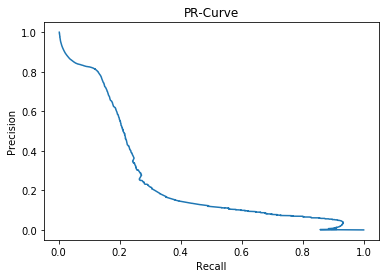

In [503]:
y_train_pred_prob=log.predict_proba(X_train)
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
print(metrics.roc_auc_score(y_train,y_train_pred))

In [505]:
y_test_pred=log.predict(X_test)
confusion_matrix_test=confusion_matrix(y_test,y_test_pred)
print(confusion_matrix_test)
print(metrics.classification_report(y_test,y_test_pred))


[[36888457      952]
 [   85997     5372]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00  36889409
          1       0.85      0.06      0.11     91369

avg / total       1.00      1.00      1.00  36980778



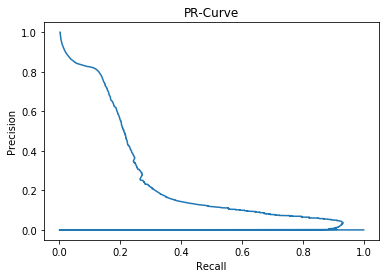

0.529384375732


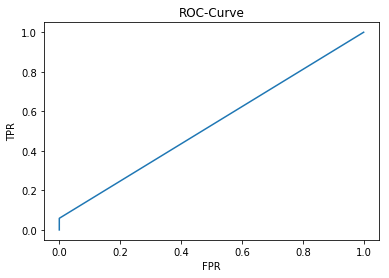

In [508]:
y_test_pred_prob=log.predict_proba(X_test)
prec,rec,thres=metrics.precision_recall_curve(y_test,y_test_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_test,y_test_pred))
tpr,fpr,thresh=metrics.roc_curve(y_test,y_test_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

# Random Forest

In [603]:
rf= RandomForestClassifier(n_jobs=-1,random_state=0,verbose=1,n_estimators=25,max_depth=4)


In [583]:
X_train.shape,y_train.shape

((147923112, 207), (147923112,))

In [604]:
rf.fit(X_train,y_train)

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000002EAAE86390, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\priyanshu.raj\AppData\Local\Continuum\a...ges\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\p...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000002EAAE86390, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\priyanshu.raj\AppData\Local\Continuum\a...ges\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\p...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'rf.fit(X_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 8, 8, 2, 46, 506328, tzinfo=tzutc()), 'msg_id': 'FD1C5D72B08140F6B76C64E9AC9210BA', 'msg_type': 'execute_request', 'session': 'F82B6CE7AE054175859CA58B46CF4174', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'FD1C5D72B08140F6B76C64E9AC9210BA', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'F82B6CE7AE054175859CA58B46CF4174']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'rf.fit(X_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 8, 8, 2, 46, 506328, tzinfo=tzutc()), 'msg_id': 'FD1C5D72B08140F6B76C64E9AC9210BA', 'msg_type': 'execute_request', 'session': 'F82B6CE7AE054175859CA58B46CF4174', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'FD1C5D72B08140F6B76C64E9AC9210BA', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'F82B6CE7AE054175859CA58B46CF4174'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'rf.fit(X_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 8, 8, 2, 46, 506328, tzinfo=tzutc()), 'msg_id': 'FD1C5D72B08140F6B76C64E9AC9210BA', 'msg_type': 'execute_request', 'session': 'F82B6CE7AE054175859CA58B46CF4174', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'FD1C5D72B08140F6B76C64E9AC9210BA', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='rf.fit(X_train,y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'rf.fit(X_train,y_train)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('rf.fit(X_train,y_train)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('rf.fit(X_train,y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='rf.fit(X_train,y_train)', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-604-d5c5b5e16589>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 2e80241710, execution..._before_exec=None error_in_exec=None result=None>)
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])
   2807                 code = compiler(mod, cell_name, "single")
-> 2808                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000031BB153390, file "<ipython-input-604-d5c5b5e16589>", line 1>
        result = <ExecutionResult object at 2e80241710, execution..._before_exec=None error_in_exec=None result=None>
   2809                     return True
   2810 
   2811             # Flush softspace
   2812             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000031BB153390, file "<ipython-input-604-d5c5b5e16589>", line 1>, result=<ExecutionResult object at 2e80241710, execution..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000031BB153390, file "<ipython-input-604-d5c5b5e16589>", line 1>
        self.user_global_ns = {'BaseEstimator': <class 'sklearn.base.BaseEstimator'>, 'Binarizer': <class 'sklearn.preprocessing.data.Binarizer'>, 'CatToOnehot': <class '__main__.CatToOnehot'>, 'Column': <class 'astropy.table.column.Column'>, 'CombineTail': <class '__main__.CombineTail'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'DFSubsetSelector': <class '__main__.DFSubsetSelector'>, 'DictVectorizer': <class 'sklearn.feature_extraction.dict_vectorizer.DictVectorizer'>, 'ENGLISH_STOP_WORDS': frozenset({'a', 'about', 'above', 'across', 'after', 'afterwards', ...}), 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, ...}
        self.user_ns = {'BaseEstimator': <class 'sklearn.base.BaseEstimator'>, 'Binarizer': <class 'sklearn.preprocessing.data.Binarizer'>, 'CatToOnehot': <class '__main__.CatToOnehot'>, 'Column': <class 'astropy.table.column.Column'>, 'CombineTail': <class '__main__.CombineTail'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'DFSubsetSelector': <class '__main__.DFSubsetSelector'>, 'DictVectorizer': <class 'sklearn.feature_extraction.dict_vectorizer.DictVectorizer'>, 'ENGLISH_STOP_WORDS': frozenset({'a', 'about', 'above', 'across', 'after', 'afterwards', ...}), 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
C:\Users\priyanshu.raj\Downloads\AdTraffic_fraud\lib\<ipython-input-604-d5c5b5e16589> in <module>()
----> 1 rf.fit(X_train,y_train)

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=1, warm_start=False), X=<147923112x207 sparse matrix of type '<class 'nu...ored elements in Compressed Sparse Column format>, y=array([[ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 24
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Sun Apr  8 13:50:07 2018
PID: 14820Python 3.6.3: C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\python.exe
...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=1, warm_start=False), <147923112x207 sparse matrix of type '<class 'nu...ored elements in Compressed Sparse Column format>, array([[ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.]]), None, 0, 25), {'class_weight': None, 'verbose': 1})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=1, warm_start=False), <147923112x207 sparse matrix of type '<class 'nu...ored elements in Compressed Sparse Column format>, array([[ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.]]), None, 0, 25)
        kwargs = {'class_weight': None, 'verbose': 1}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=1, warm_start=False), X=<147923112x207 sparse matrix of type '<class 'nu...ored elements in Compressed Sparse Column format>, y=array([[ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.]]), sample_weight=None, tree_idx=0, n_trees=25, verbose=1, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...        random_state=209652396, splitter='best')>
        X = <147923112x207 sparse matrix of type '<class 'nu...ored elements in Compressed Sparse Column format>
        y = array([[ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.]])
        sample_weight = None
        curr_sample_weight = array([ 1.,  0., ...,  1.,  0.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), X=<147923112x207 sparse matrix of type '<class 'nu...ored elements in Compressed Sparse Column format>, y=array([[ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.]]), sample_weight=array([ 1.,  0., ...,  1.,  0.]), check_input=False, X_idx_sorted=None)
    785 
    786         super(DecisionTreeClassifier, self).fit(
    787             X, y,
    788             sample_weight=sample_weight,
    789             check_input=check_input,
--> 790             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    791         return self
    792 
    793     def predict_proba(self, X, check_input=True):
    794         """Predict class probabilities of the input samples X.

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), X=<147923112x207 sparse matrix of type '<class 'nu...ored elements in Compressed Sparse Column format>, y=array([[ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.]]), sample_weight=array([ 1.,  0., ...,  1.,  0.]), check_input=False, X_idx_sorted=None)
    147                 y_original = np.copy(y)
    148 
    149             y_encoded = np.zeros(y.shape, dtype=np.int)
    150             for k in range(self.n_outputs_):
    151                 classes_k, y_encoded[:, k] = np.unique(y[:, k],
--> 152                                                        return_inverse=True)
    153                 self.classes_.append(classes_k)
    154                 self.n_classes_.append(classes_k.shape[0])
    155             y = y_encoded
    156 

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py in unique(ar=array([ 0.,  0., ...,  0.,  0.]), return_index=False, return_inverse=True, return_counts=False, axis=None)
    205     array([1, 2, 6, 4, 2, 3, 2])
    206 
    207     """
    208     ar = np.asanyarray(ar)
    209     if axis is None:
--> 210         return _unique1d(ar, return_index, return_inverse, return_counts)
        ar = array([ 0.,  0., ...,  0.,  0.])
        return_index = False
        return_inverse = True
        return_counts = False
    211     if not (-ar.ndim <= axis < ar.ndim):
    212         raise ValueError('Invalid axis kwarg specified for unique')
    213 
    214     ar = np.swapaxes(ar, axis, 0)

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py in _unique1d(ar=array([ 0.,  0., ...,  0.,  0.]), return_index=False, return_inverse=True, return_counts=False)
    283     else:
    284         ret = (aux[flag],)
    285         if return_index:
    286             ret += (perm[flag],)
    287         if return_inverse:
--> 288             iflag = np.cumsum(flag) - 1
        iflag = undefined
        flag = array([ True, False, ..., False, False], dtype=bool)
    289             inv_idx = np.empty(ar.shape, dtype=np.intp)
    290             inv_idx[perm] = iflag
    291             ret += (inv_idx,)
    292         if return_counts:

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py in cumsum(a=array([ True, False, ..., False, False], dtype=bool), axis=None, dtype=None, out=None)
   2112     >>> np.cumsum(a,axis=1)      # sum over columns for each of the 2 rows
   2113     array([[ 1,  3,  6],
   2114            [ 4,  9, 15]])
   2115 
   2116     """
-> 2117     return _wrapfunc(a, 'cumsum', axis=axis, dtype=dtype, out=out)
        a = array([ True, False, ..., False, False], dtype=bool)
        axis = None
        dtype = None
        out = None
   2118 
   2119 
   2120 def cumproduct(a, axis=None, dtype=None, out=None):
   2121     """

...........................................................................
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py in _wrapfunc(obj=array([ True, False, ..., False, False], dtype=bool), method='cumsum', *args=(), **kwds={'axis': None, 'dtype': None, 'out': None})
     52     return result
     53 
     54 
     55 def _wrapfunc(obj, method, *args, **kwds):
     56     try:
---> 57         return getattr(obj, method)(*args, **kwds)
        obj = array([ True, False, ..., False, False], dtype=bool)
        method = 'cumsum'
        args = ()
        kwds = {'axis': None, 'dtype': None, 'out': None}
     58 
     59     # An AttributeError occurs if the object does not have
     60     # such a method in its class.
     61 

MemoryError: 
___________________________________________________________________________

In [586]:
y_train_pred=rf.predict(X_train)
#y_test_pred=log.predict(X_test)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))


[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:  1.0min remaining:  4.2min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  1.2min finished


[[147557635         0]
 [   365477         0]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00 147557635
          1       0.00      0.00      0.00    365477

avg / total       1.00      1.00      1.00 147923112



[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:  1.1min remaining:  4.4min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  1.2min finished


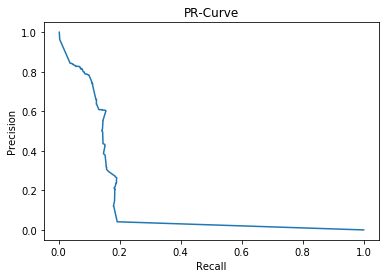

0.5


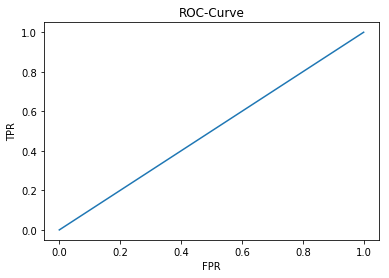

In [587]:
y_train_pred_prob=rf.predict_proba(X_train)
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_train,y_train_pred))
tpr,fpr,thresh=metrics.roc_curve(y_train,y_train_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

In [ ]:
y_test_pred=rf.predict(X_test)
confusion_matrix_test=confusion_matrix(y_test,y_test_pred)
print(confusion_matrix_test)
print(metrics.classification_report(y_test,y_test_pred))


In [ ]:
y_test_pred_prob=rf.predict_proba(X_test)
prec,rec,thres=metrics.precision_recall_curve(y_test,y_test_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_test,y_test_pred))
tpr,fpr,thresh=metrics.roc_curve(y_test,y_test_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

In [606]:
# to release memory
import gc

gc.collect()

1767

In [607]:
import psutil
psutil.virtual_memory()

svmem(total=137372446720, available=122710667264, percent=10.7, used=14661779456, free=122710667264)

In [592]:
import sys
for obj in locals().values():
        print(sys.getsizeof(obj) )

57
113
16
16
16
80
80
4848
9320
72
4848
9320
64
56
56
88
24
88
86
92
86
51
1237
80
80
80
80
80
80
80
80
1184
1184
80
80
136
888
1056
1056
1056
1056
80
136
136
136
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
136
1056
136
136
136
136
136
136
136
1056
80
136
136
80
1056
1056
8416
1056
1056
136
136
136
400
1056
1056
80
90
164
76
64
77
884
109
94
2043
77
235
112
102
94
838
211
1357
543
80
56
400
112
123
197
1453
127
128
123
9330
127
9330
112
111
28576
112
110
9114
137
8720
170
171
171
156
150
296
261
351
355
6528
265
296
355
6528
137
8720
127
77
1615238
154
155
112
162
191
80
234
235
151
528
1156
1056
1056
1056
909
2000
1056
1056
1464
80
1056
1464
56
7735478936
1933869752
423
128
56
106
80
230
377
909
106
80
230
422
423
909
106
80
230
425
909
106
80
230
427
909
106
80
230
429
909
106
80
230
106
112
83
112
154
56
379
909
106
80
230
409
909
106
80
230
56
56
62
64
64
66
61
56
61
56
68
67
67
68
63
167
1183384992
263
62
888
69
64
75
82
82
163
295846320
263
89
138
62
888
72
400
74
230


In [599]:
#del app_prcnt
#del app_to_be_bucketed
del y_train_pred
del y_train_pred_prob
del y_test_pred
del y_test_pred_prob

# Decision Tree Model

In [545]:
dt= tree.DecisionTreeClassifier(max_depth=4)


In [546]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [550]:
X_train.shape,y_train.shape

((147923112, 207), (147923112,))

In [548]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [551]:
y_train_pred=dt.predict(X_train)
#y_test_pred=log.predict(X_test)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))


[[147548981      8654]
 [   343943     21534]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00 147557635
          1       0.71      0.06      0.11    365477

avg / total       1.00      1.00      1.00 147923112



0.529430806051


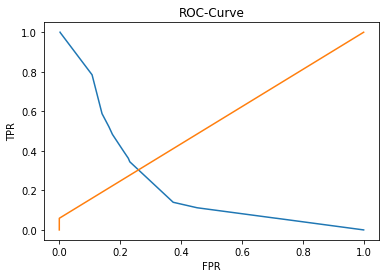

In [552]:
y_train_pred_prob=dt.predict_proba(X_train)
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
print(metrics.roc_auc_score(y_train,y_train_pred))
tpr,fpr,thresh=metrics.roc_curve(y_train,y_train_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()

In [553]:
y_test_pred=dt.predict(X_test)
confusion_matrix_test=confusion_matrix(y_test,y_test_pred)
print(confusion_matrix_test)
print(metrics.classification_report(y_test,y_test_pred))


[[36887275     2134]
 [   86054     5315]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00  36889409
          1       0.71      0.06      0.11     91369

avg / total       1.00      1.00      1.00  36980778



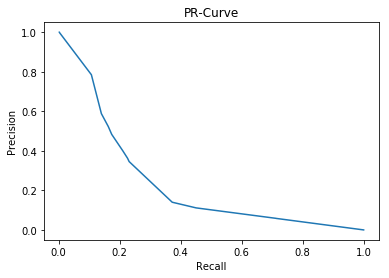

0.529056432887


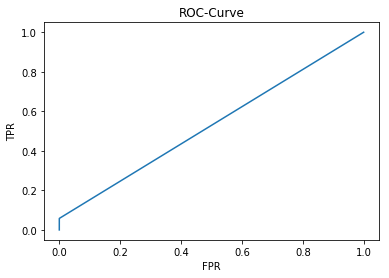

In [554]:
y_test_pred_prob=dt.predict_proba(X_test)
prec,rec,thres=metrics.precision_recall_curve(y_test,y_test_pred_prob[:,1])
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
plt.show()
print(metrics.roc_auc_score(y_test,y_test_pred))
tpr,fpr,thresh=metrics.roc_curve(y_test,y_test_pred)
plt.plot(tpr,fpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC-Curve')
plt.show()